In [2]:
#%load_ext watermark
%load_ext autoreload 
%autoreload 2

In [3]:
import os
import sys
from copy import deepcopy
import itertools
from functools import partial
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from pybpr import *

train_loss
test_loss
train_auc
test_auc


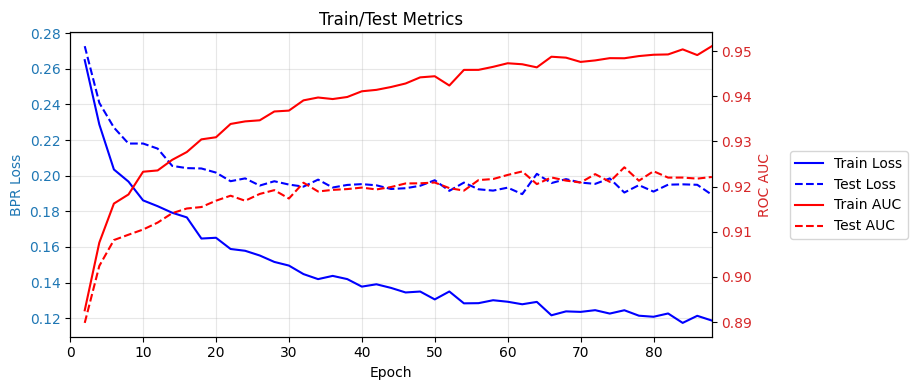

In [17]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens2'
case_name = '0_metadata_bpr_loss_neg-ignore_ld32_lr5_wd0'
fig, axs, df = RecSys.plot_metrics(os.path.join(output_dir, case_name, 'metrics.json'), figsize=(8,4))

train_loss
test_loss
train_auc
test_auc


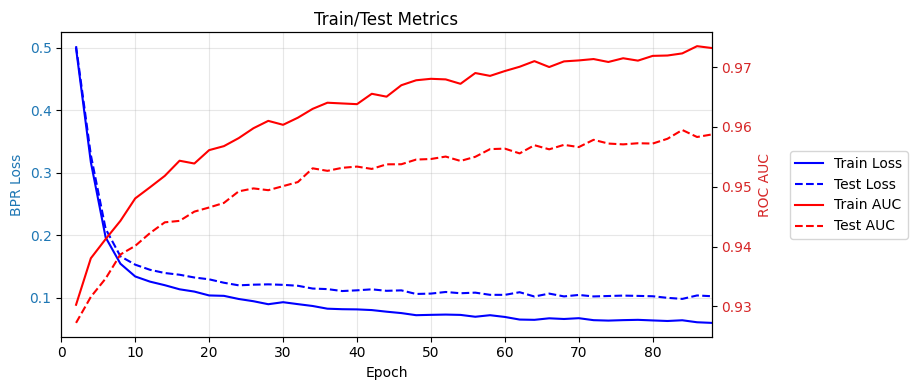

In [14]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens2'
case_name = '0_indicator_bpr_loss_neg-ignore_ld64_lr5_wd0'
fig, axs, df = RecSys.plot_metrics(os.path.join(output_dir, case_name, 'metrics.json'), figsize=(8,4))

train_loss
test_loss
train_auc
test_auc


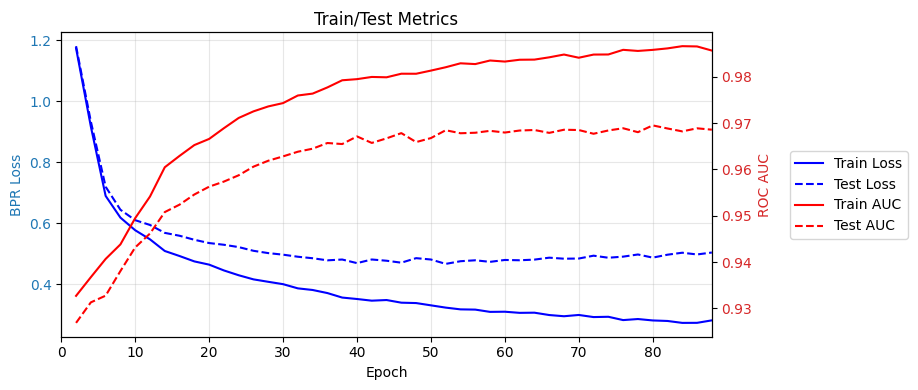

In [11]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens2'
case_name = '0_indicator_bpr_loss_v2_neg-ignore_ld64_lr5_wd0'
fig, axs, df = RecSys.plot_metrics(os.path.join(output_dir, case_name, 'metrics.json'), figsize=(8,4))

In [87]:
xx = [3,4,5]
yy = [1,2,3]
np.where(np.isin(xx,yy))[0].tolist()

[0]

Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens1/indicator_bpr_neg-test_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs2/projects/zazzle/pybpr/examples/output/movielens1/indicator_bpr_neg-test_ld64_lr5_wd0/metrics.json'
Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens1/indicator_bpr_neg-both_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs2/projects/zazzle/pybpr/examples/output/movielens1/indicator_bpr_neg-both_ld64_lr5_wd0/metrics.json'
Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens1/metadata_bpr_neg-test_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs2/projects/zazzle/pybpr/examples/output/movielens1/metadata_bpr_neg-test_ld64_lr5_wd0/metrics.json'
Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens1/metadata_bpr_neg-both_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs

Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens1/indicator_bpr_neg-test_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens1/indicator_bpr_neg-both_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens1/metadata_bpr_neg-test_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens1/metadata_bpr_neg-both_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens1/both_bpr_neg-test_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens1/both_bpr_neg-both_ld64_lr5_wd0/metrics.json


AttributeError: 'DataFrame' object has no attribute 'test_auc'

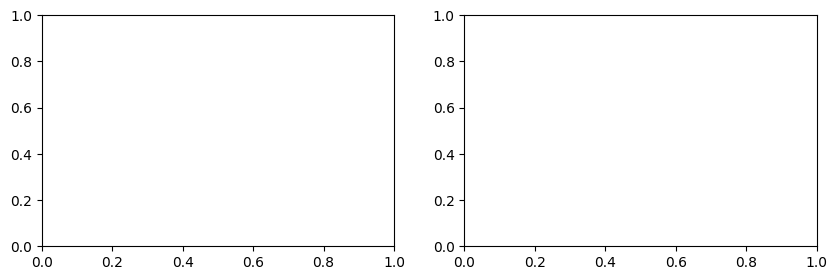

In [7]:
def get_results(case_name):
    filepath = os.path.join(output_dir, case_name, 'metrics.json')
    try:
        fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(9,4), title=case_name)
        with open(filepath, 'r') as f:
            df = pd.DataFrame(json.load(f))
        df = df[df['epoch']>20]
        return df.loc[df['test_loss'].idxmin()]
    except:
        print(f'Cant find {filepath}')
    #return df.loc[df['test_auc_median'].idxmax()]

input_list = ['indicator','metadata','both']
list1, list2, list3 = [], [], []
for ix in input_list:
    # case_name = f'{ix}_bpr_neg-ignore_ld64_lr5_wd0'
    # list1.append(get_results(case_name))
    case_name = f'{ix}_bpr_neg-test_ld64_lr5_wd0'
    list2.append(get_results(case_name))
    case_name = f'{ix}_bpr_neg-both_ld64_lr5_wd0'
    list3.append(get_results(case_name))
    
rdf1 = pd.DataFrame(list1)
rdf2 = pd.DataFrame(list2)
rdf3 = pd.DataFrame(list3)

fig, ax = plt.subplots(1,2,figsize=(10,3))
# ax[0].plot(input_list, rdf1.test_auc_mean, '--b^', label='Train(0), Test(0)')
# ax[0].plot(input_list, rdf1.test_auc_median, '--k^', label='Train(0), Test(0)')
ax[0].plot(input_list, rdf2.test_auc, '--r^', label='Train(0), Test(1)')
ax[0].plot(input_list, rdf3.test_auc, '--g^', label='Train(0.8), Test(0.2)')
#ax[1].plot(input_list, rdf1.test_loss, '--b^', label='Train(0), Test(0)')
ax[1].plot(input_list, rdf2.test_loss, '--r^', label='Train(0), Test(1)')
ax[1].plot(input_list, rdf3.test_loss, '--g^', label='Train(0.8), Test(0.2)')
#ax[0].plot(input_list, rdf.train_auc_mean, '--r^', label='train_auc_mean')
#ax.errorbar(input_list, rdf.test_auc_mean, yerr=0.25*rdf.test_auc_std)
#ax[0].plot(input_list, rdf.test_auc_median, '-.r^', label='test_auc_median')
for iax in ax:
    iax.legend()
    iax.grid(True)
ax[0].set_ylabel('ROC AUC Score')
ax[1].set_ylabel('BPR Loss')
fig.tight_layout()
#ax.set_ylim([0.5, 1])

Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens6/indicator_bpr_neg-test_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs2/projects/zazzle/pybpr/examples/output/movielens6/indicator_bpr_neg-test_ld64_lr5_wd0/metrics.json'
Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens6/indicator_bpr_neg-both_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs2/projects/zazzle/pybpr/examples/output/movielens6/indicator_bpr_neg-both_ld64_lr5_wd0/metrics.json'
Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens6/metadata_bpr_neg-test_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs2/projects/zazzle/pybpr/examples/output/movielens6/metadata_bpr_neg-test_ld64_lr5_wd0/metrics.json'
Failed to load metrics from /kfs2/projects/zazzle/pybpr/examples/output/movielens6/metadata_bpr_neg-both_ld64_lr5_wd0/metrics.json: [Errno 2] No such file or directory: '/kfs

Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens6/indicator_bpr_neg-test_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens6/indicator_bpr_neg-both_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens6/metadata_bpr_neg-test_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens6/metadata_bpr_neg-both_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens6/both_bpr_neg-test_ld64_lr5_wd0/metrics.json
Cant find /kfs2/projects/zazzle/pybpr/examples/output/movielens6/both_bpr_neg-both_ld64_lr5_wd0/metrics.json


AttributeError: 'DataFrame' object has no attribute 'test_auc_median'

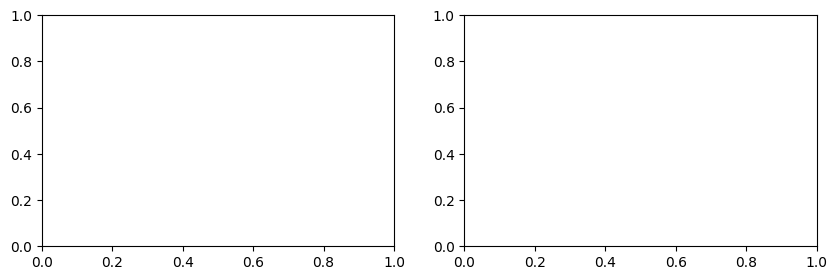

In [88]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens6'
def get_results(case_name):
    filepath = os.path.join(output_dir, case_name, 'metrics.json')
    try:
        fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(9,4), title=case_name)
        with open(filepath, 'r') as f:
            df = pd.DataFrame(json.load(f))
        df = df[df['epoch']>20]
        return df.loc[df['test_loss'].idxmin()]
    except:
        print(f'Cant find {filepath}')
    #return df.loc[df['test_auc_median'].idxmax()]

input_list = ['indicator','metadata','both']
list1, list2, list3 = [], [], []
for ix in input_list:
    # case_name = f'{ix}_bpr_neg-ignore_ld64_lr5_wd0'
    # list1.append(get_results(case_name))
    case_name = f'{ix}_bpr_neg-test_ld64_lr5_wd0'
    list2.append(get_results(case_name))
    case_name = f'{ix}_bpr_neg-both_ld64_lr5_wd0'
    list3.append(get_results(case_name))
    
rdf1 = pd.DataFrame(list1)
rdf2 = pd.DataFrame(list2)
rdf3 = pd.DataFrame(list3)

fig, ax = plt.subplots(1,2,figsize=(10,3))
# ax[0].plot(input_list, rdf1.test_auc_mean, '--b^', label='Train(0), Test(0)')
# ax[0].plot(input_list, rdf1.test_auc_median, '--k^', label='Train(0), Test(0)')
ax[0].plot(input_list, rdf2.test_auc_median, '--r^', label='Train(0), Test(1)')
ax[0].plot(input_list, rdf3.test_auc_median, '--g^', label='Train(0.8), Test(0.2)')
#ax[1].plot(input_list, rdf1.test_loss, '--b^', label='Train(0), Test(0)')
ax[1].plot(input_list, rdf2.test_loss, '--r^', label='Train(0), Test(1)')
ax[1].plot(input_list, rdf3.test_loss, '--g^', label='Train(0.8), Test(0.2)')
#ax[0].plot(input_list, rdf.train_auc_mean, '--r^', label='train_auc_mean')
#ax.errorbar(input_list, rdf.test_auc_mean, yerr=0.25*rdf.test_auc_std)
#ax[0].plot(input_list, rdf.test_auc_median, '-.r^', label='test_auc_median')
for iax in ax:
    iax.legend()
    iax.grid(True)
ax[0].set_ylabel('ROC AUC Score')
ax[1].set_ylabel('BPR Loss')
fig.tight_layout()
#ax.set_ylim([0.5, 1])

In [13]:
rdf1

,epoch,loss,test_auc_mean,test_auc_median,test_auc_std,test_loss,test_n_users_evaluated,train_auc_mean,train_auc_median,train_auc_std,train_loss,train_n_users_evaluated
9,10.0,0.212213,0.93653,0.958144,0.068271,0.205264,64226.0,0.942251,0.955692,0.054511,0.198006,69648.0
9,10.0,0.199082,0.91514,0.930297,0.071043,0.216453,64358.0,0.924963,0.933879,0.052621,0.193657,69650.0
9,10.0,0.155026,0.93885,0.953530,0.058214,0.165516,64247.0,0.946694,0.955636,0.043577,0.151821,69642.0


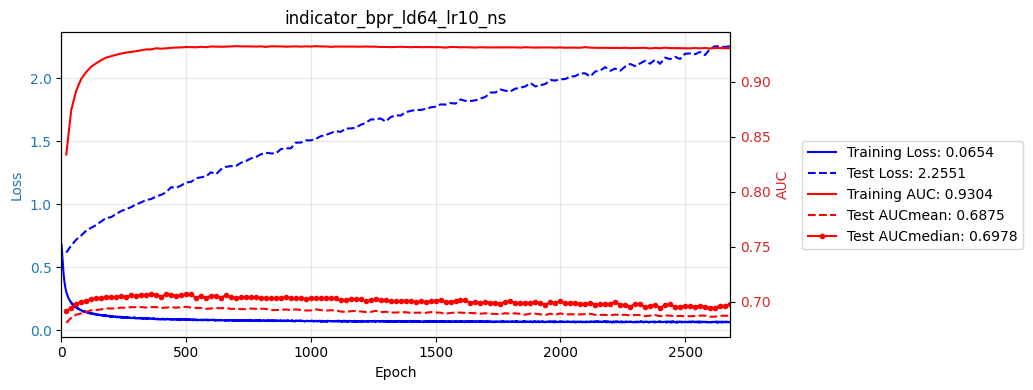

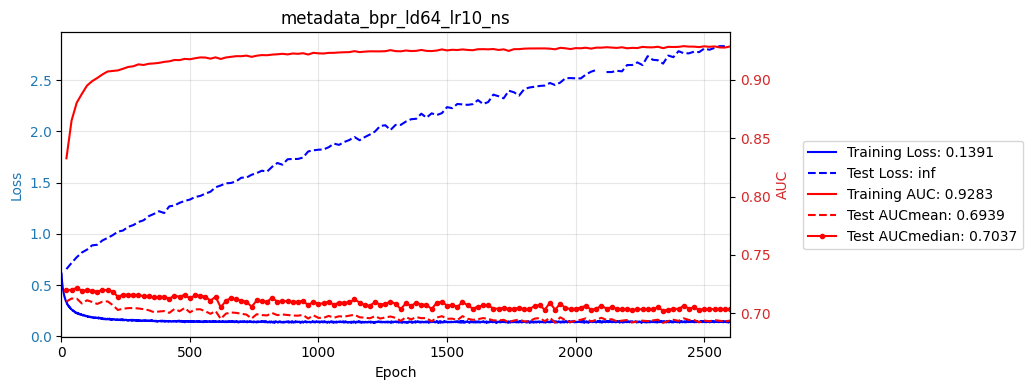

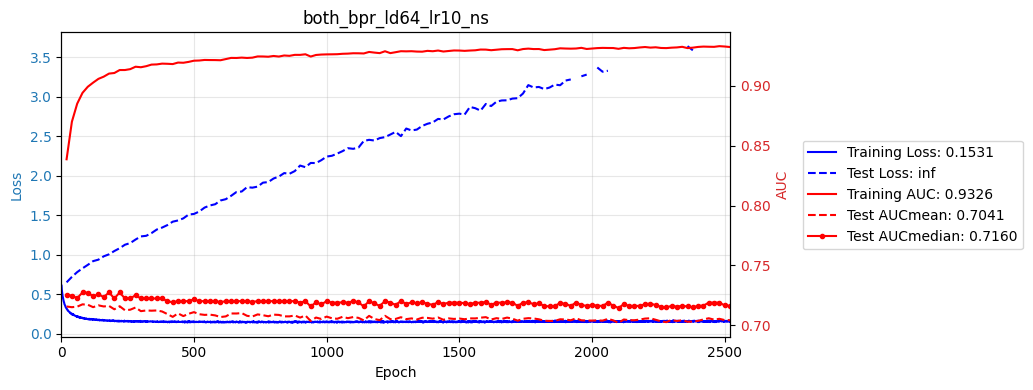

In [54]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens2'
case_names = ['indicator_bpr_ld64_lr10_ns', 'metadata_bpr_ld64_lr10_ns', 'both_bpr_ld64_lr10_ns']
for iname in case_names:
    filepath = os.path.join(output_dir, iname, 'metrics.json')
    fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(9,4), title=iname)

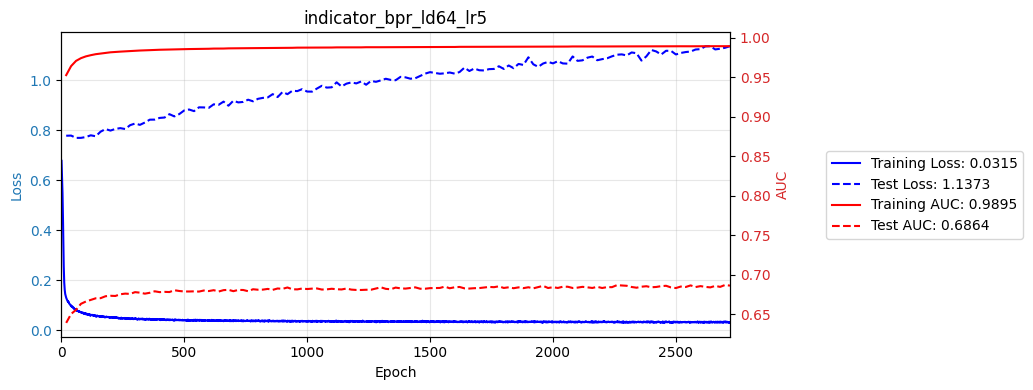

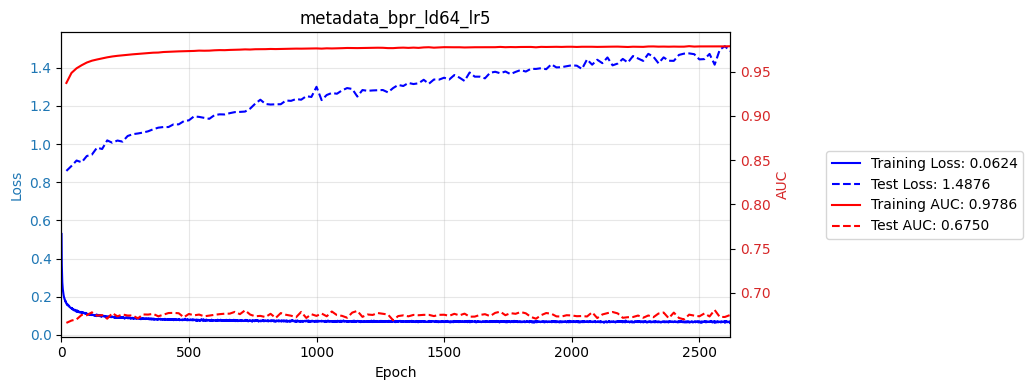

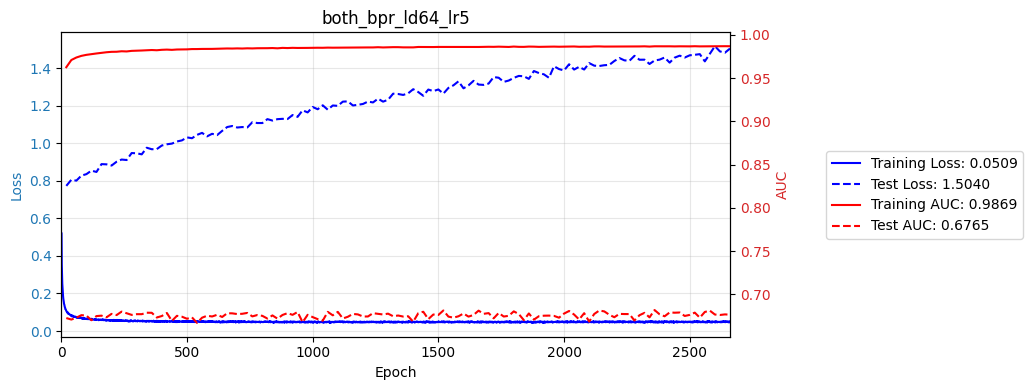

In [50]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens2'
case_names = ['indicator_bpr_ld64_lr5', 'metadata_bpr_ld64_lr5', 'both_bpr_ld64_lr5']
for iname in case_names:
    filepath = os.path.join(output_dir, iname, 'metrics.json')
    fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(9,4), title=iname)

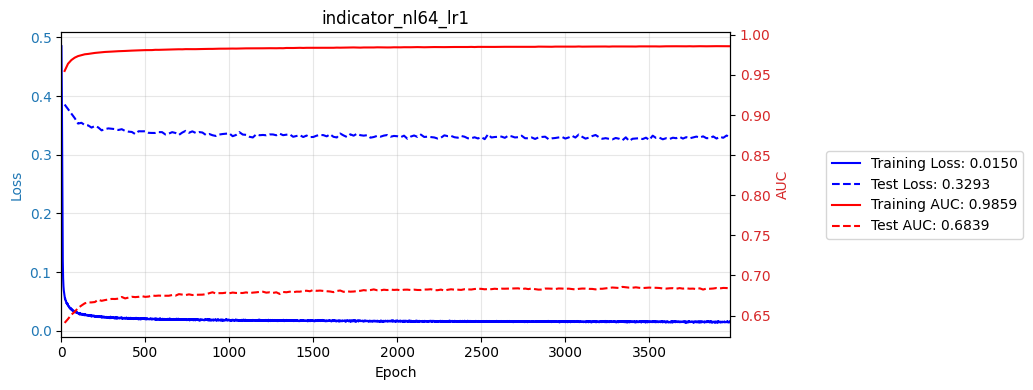

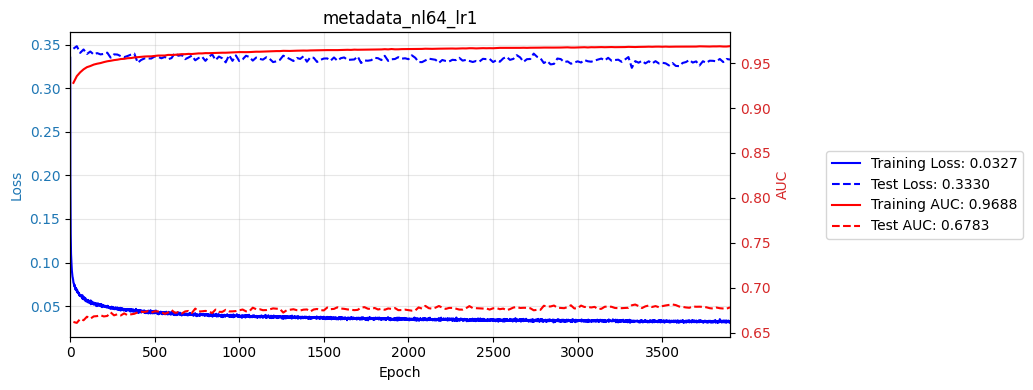

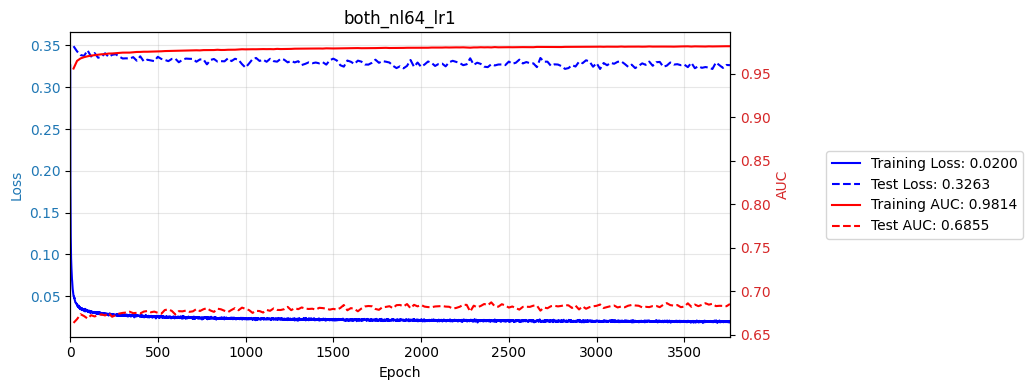

In [46]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens'
case_names = ['indicator_nl64_lr1', 'metadata_nl64_lr1', 'both_nl64_lr1']
for iname in case_names:
    filepath = os.path.join(output_dir, iname, 'metrics.json')
    fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(9,4), title=iname)

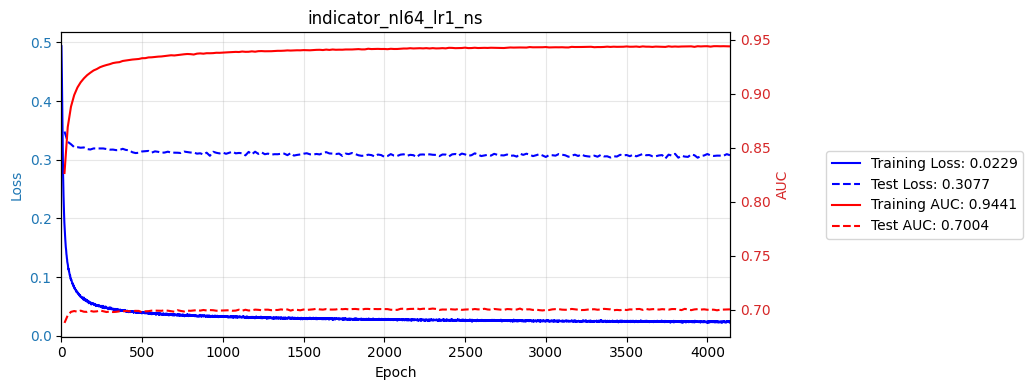

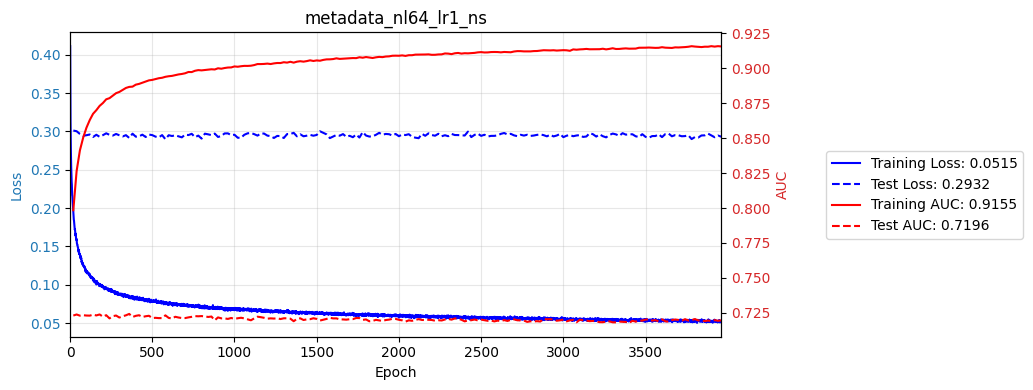

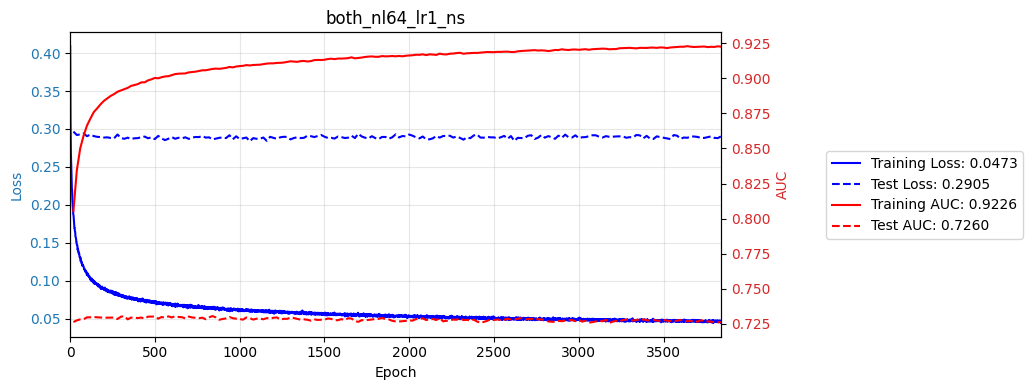

In [36]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens'
case_names = ['indicator_nl64_lr1_ns', 'metadata_nl64_lr1_ns', 'both_nl64_lr1_ns']
for iname in case_names:
    filepath = os.path.join(output_dir, iname, 'metrics.json')
    fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(9,4), title=iname)

In [85]:
from pybpr import *
data_dir = '/home/rsandhu/zazzle/raw_data'

In [86]:
# tdf = pd.read_csv(os.path.join(data_dir, 'ml-10M100K', 'tags.dat'), sep='::', engine='python', header=None)
# tdf.columns = ['UserID','MovieID','Tag','Timestamp']
# tdf.head()
tdf_tag = pd.read_csv(os.path.join(data_dir, 'tag-genome','tags.dat'), sep='\t', header=None)
tdf_tag.columns = ['TagID','Tag','TagPopularity']
tdf_tag.head(100)
# tdf_movie = pd.read_csv(os.path.join(data_dir, 'tag-genome','movies.dat'), sep='\t', header=None)
# tdf_movie.columns = ['MovieID','Title','MoviePopularity']
# tdf_movie.head()

,TagID,Tag,TagPopularity
0,0,007,61
1,1,007 (series),24
2,2,18th century,37
3,3,1920s,42
4,4,1930s,55
...,...,...,...
95,95,bad,21
96,96,bad acting,182
97,97,bad cgi,34
98,98,bad ending,104


In [87]:
data_dir = '/home/rsandhu/zazzle/raw_data'
mdf = pd.read_csv(os.path.join(data_dir, 'ml-10M100K','movies.dat'), sep='::', engine='python', header=None)
mdf.columns = ['MovieID', 'Title','Genres']
#mdf.set_index('MovieID', inplace=True)
mdf.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [88]:
tdf = pd.read_csv(os.path.join(data_dir, 'tag-genome','tag_relevance.dat'), sep='\t', header=None)
tdf.columns = ['MovieID','TagID','Relevance']
tdf.drop(index=tdf.index[tdf.Relevance < 0.8], inplace=True)
tdf.head()

,MovieID,TagID,Relevance
28,1,28,0.894
62,1,62,0.979
63,1,63,0.987
185,1,185,0.947
202,1,202,0.898


In [89]:
rdf = pd.read_csv(os.path.join(data_dir, 'ml-10M100K', 'ratings.dat'), sep='::', engine='python', header=None)
rdf.columns= ['UserID','MovieID','Rating','Timestamp']
rdf.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [90]:
rdf.head()
#tdf.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [91]:
tdf.head()

,MovieID,TagID,Relevance
28,1,28,0.894
62,1,62,0.979
63,1,63,0.987
185,1,185,0.947
202,1,202,0.898


In [92]:
ui = UserItemData(name='User-Metadata-only')
ui.add_positive_interactions(
     user_ids=rdf.UserID[rdf.Rating>=4.], 
     item_ids=rdf.MovieID[rdf.Rating>=4.]
)
# ui.add_negative_interactions(
#     user_ids=rdf.UserID[rdf.Rating<4.], 
#     item_ids=rdf.MovieID[rdf.Rating<4.]
# )
ui.add_user_features(
    user_ids=rdf.UserID.unique(), 
    feature_ids=rdf.UserID.unique()
)
ui.add_item_features(
     item_ids=tdf.MovieID, 
     feature_ids=tdf.TagID
)
#ui.validate_dataset()
ui

UserItemData(User-Metadata-only)
  Fuser     :( 69878× 69878) nnz=    69,878 (0.001%), empty rows/cols=     0/     0
  Fitem     :( 11584×  1096) nnz=   101,624 (0.800%), empty rows/cols=  2042/     0
  Rpos      :( 69878× 11584) nnz= 5,005,684 (0.618%), empty rows/cols=    81/  1326
  Rneg      :( 69878× 11584) nnz=         0 (0.000%), empty rows/cols= 69878/ 11584

In [93]:
ui.train_test_split(train_ratio_pos=0.8, train_ratio_neg=0.8, show_progress=True)

Train/Test Split (Cols): 100%|██████████| 11584/11584 [00:00<00:00, 1949164.26it/s]


In [94]:
ui

UserItemData(User-Metadata-only)
  Fuser     :( 69878× 69878) nnz=    69,878 (0.001%), empty rows/cols=     0/     0
  Fitem     :( 11584×  1096) nnz=   101,624 (0.800%), empty rows/cols=  2042/     0
  Rpos      :( 69878× 11584) nnz= 5,005,684 (0.618%), empty rows/cols=    81/  1326
  Rneg      :( 69878× 11584) nnz=         0 (0.000%), empty rows/cols= 69878/ 11584
  Rpos_train:( 69878× 11584) nnz= 4,004,687 (0.495%), empty rows/cols=    81/  1326
  Rpos_test :( 69878× 11584) nnz= 1,000,997 (0.124%), empty rows/cols=  1790/  2629
  Rneg_train:( 69878× 11584) nnz=         0 (0.000%), empty rows/cols= 69878/ 11584
  Rneg_test :( 69878× 11584) nnz=         0 (0.000%), empty rows/cols= 69878/ 11584

In [95]:
recommender = RecSys(
    data=ui,
    model=HybridMF(ui.n_user_features,
                   ui.n_item_features, n_latent=64),
    optimizer=partial(
        torch.optim.Adam, lr=0.002, weight_decay=0.
    ),
    loss_function=bpr_loss,
    output_dir=os.path.join(output_dir, ui.name),
    log_level=2
)
recommender

INFO - Initiating Hybrid Recommender System..
INFO - Output directory set to: /kfs2/projects/zazzle/pybpr/examples/output/movielens5/User-Metadata-only


RecSys(
Data=UserItemData(User-Metadata-only)
  Fuser     :( 69878× 69878) nnz=    69,878 (0.001%), empty rows/cols=     0/     0
  Fitem     :( 11584×  1096) nnz=   101,624 (0.800%), empty rows/cols=  2042/     0
  Rpos      :( 69878× 11584) nnz= 5,005,684 (0.618%), empty rows/cols=    81/  1326
  Rneg      :( 69878× 11584) nnz=         0 (0.000%), empty rows/cols= 69878/ 11584
  Rpos_train:( 69878× 11584) nnz= 4,004,687 (0.495%), empty rows/cols=    81/  1326
  Rpos_test :( 69878× 11584) nnz= 1,000,997 (0.124%), empty rows/cols=  1790/  2629
  Rneg_train:( 69878× 11584) nnz=         0 (0.000%), empty rows/cols= 69878/ 11584
  Rneg_test :( 69878× 11584) nnz=         0 (0.000%), empty rows/cols= 69878/ 11584
Model=HybridMF(
  (user_latent): Embedding(69878, 64)
  (item_latent): Embedding(1096, 64)
  (item_biases): Embedding(1096, 1)
)
Optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach:

In [98]:
recommender.fit(
    n_iter=10,
    batch_size=2000,
    eval_every=5,
    save_every=5,
    eval_user_size=10000,
    eval_batch_size=10000,
    disable_progress_bar=False
)

INFO - Batch size = 2,000
INFO - # of minibatches = 35
INFO - Eval frequency = 5 epochs
INFO - Save frequency = 5 epochs


HybBPR:  40%|████      | 4/10 [00:01<00:02,  2.33it/s, loss=0.1964]

INFO - Eval at epoch 15: Test AUC: 0.9184, Test Loss: 0.2008
DEBUG - Saved metrics to /kfs2/projects/zazzle/pybpr/examples/output/movielens5/User-Metadata-only/metrics.json
DEBUG - Model state dict saved to /kfs2/projects/zazzle/pybpr/examples/output/movielens5/User-Metadata-only/rec_model.torch


HybBPR:  90%|█████████ | 9/10 [01:36<00:07,  7.39s/it, loss=0.1781]

INFO - Eval at epoch 20: Test AUC: 0.9211, Test Loss: 0.2100
DEBUG - Saved metrics to /kfs2/projects/zazzle/pybpr/examples/output/movielens5/User-Metadata-only/metrics.json
DEBUG - Model state dict saved to /kfs2/projects/zazzle/pybpr/examples/output/movielens5/User-Metadata-only/rec_model.torch


HybBPR: 100%|██████████| 10/10 [03:09<00:00, 18.92s/it, loss=0.1785]


In [97]:
recommender.metrics

[{'epoch': 1, 'loss': 0.5276793828196314},
 {'epoch': 2, 'loss': 0.386428676686632},
 {'epoch': 3, 'loss': 0.3326202126679599},
 {'epoch': 4, 'loss': 0.2967526703423507},
 {'epoch': 5,
  'loss': 0.27310924827672506,
  'test_auc_mean': np.float64(0.8940179796584533),
  'test_auc_median': np.float64(0.9097411001845412),
  'test_auc_std': np.float64(0.08162875135609945),
  'test_loss': 0.2658255696296692,
  'test_n_users_evaluated': 18880,
  'train_auc_mean': np.float64(0.8986436486322879),
  'train_auc_median': np.float64(0.9086708384031521),
  'train_auc_std': np.float64(0.06268907750412155),
  'train_loss': 0.26134827733039856,
  'train_n_users_evaluated': 19959},
 {'epoch': 6, 'loss': 0.2538480097319483},
 {'epoch': 7, 'loss': 0.24143318317274734},
 {'epoch': 8, 'loss': 0.23040314410870036},
 {'epoch': 9, 'loss': 0.22418409342677645},
 {'epoch': 10,
  'loss': 0.21550843243190945,
  'test_auc_mean': np.float64(0.9107711898008701),
  'test_auc_median': np.float64(0.9264540661999827),
  

In [65]:
int(np.ceil(100 / 60))

2

In [ ]:
Rneg_csr = ui.Rneg.tocsr()
random_col_for_row(Rneg_csr, [13,13,13])

In [ ]:
row_index = 1000
csr_matrix=ui.Rpos.tocsr()
row_start = csr_matrix.indptr[row_index]
row_end = csr_matrix.indptr[row_index + 1]

# Get the column indices of nonzero elements in this row
nonzero_col_indices = csr_matrix.indices[row_start:row_end]
nonzero_col_indices

In [ ]:
random_col_for_row(ui.Rneg.tocsr(), [row_index for _ in range(20)])

In [ ]:
np.concatenate((user_neg_items, np.random.choice([1,2,3,4],3)))


In [ ]:
adam = partial(
    torch.optim.Adam,
    lr=0.02,
    weight_decay=0.0
)
rs = RecSys(
    data = ui,
    model= HybridMF(ui.n_user_features, ui.n_item_features, n_latent=64),
    optimizer=partial(torch.optim.Adam, lr=0.02, weight_decay=0.0),
    output_dir='/kfs2/projects/zazzle/pybpr/notebooks/output/ml-run',
    log_level=1
)
rs

In [ ]:
rs.model

In [ ]:
rs.fit(n_iter=20, eval_every=20, eval_sample_size=5000)

In [ ]:
rs.model

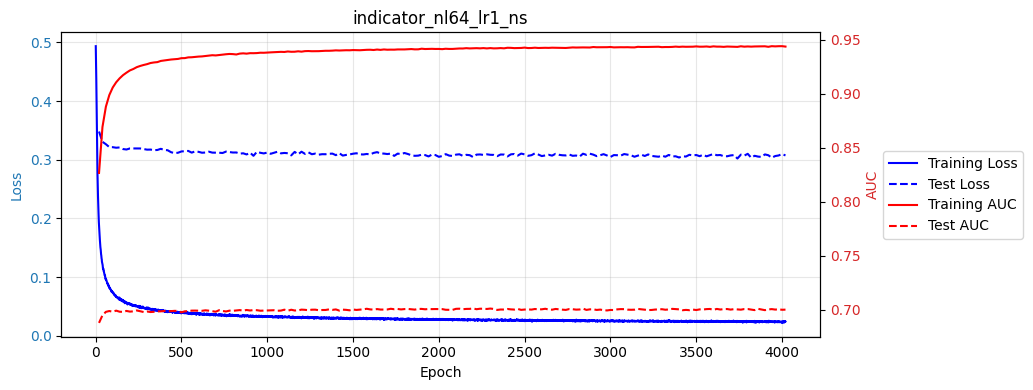

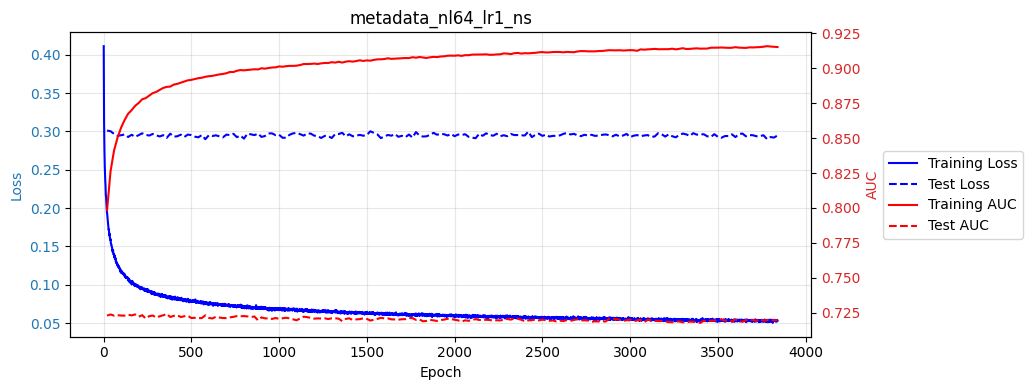

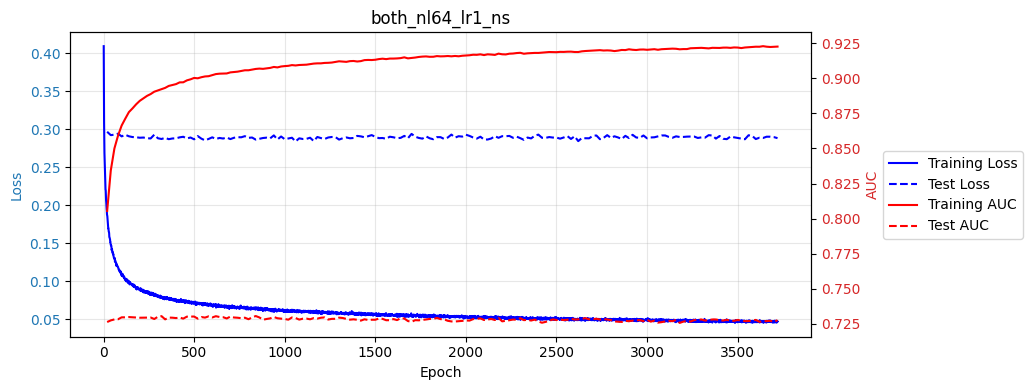

(0.6, 0.8)

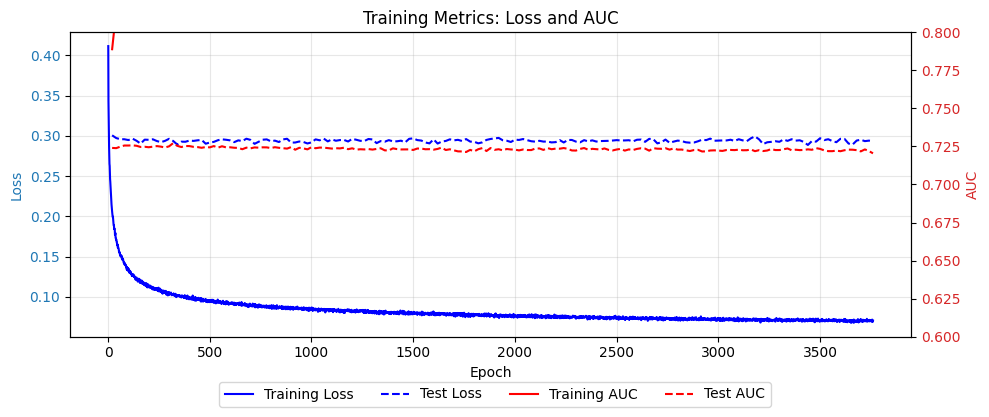

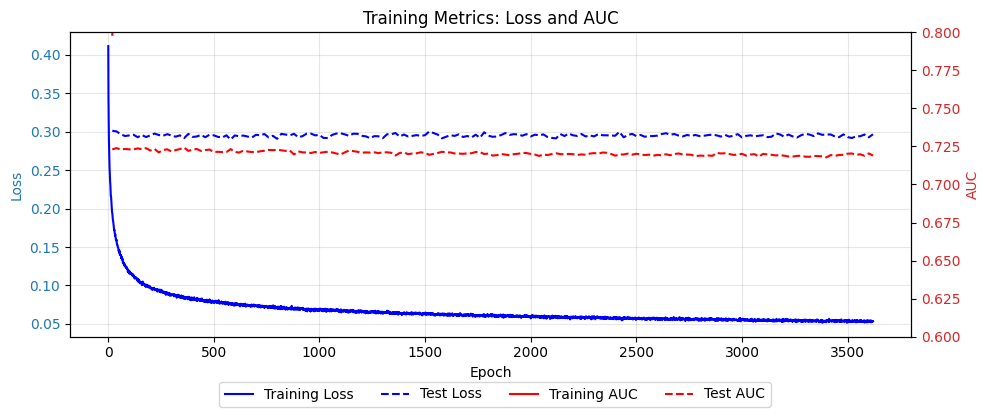

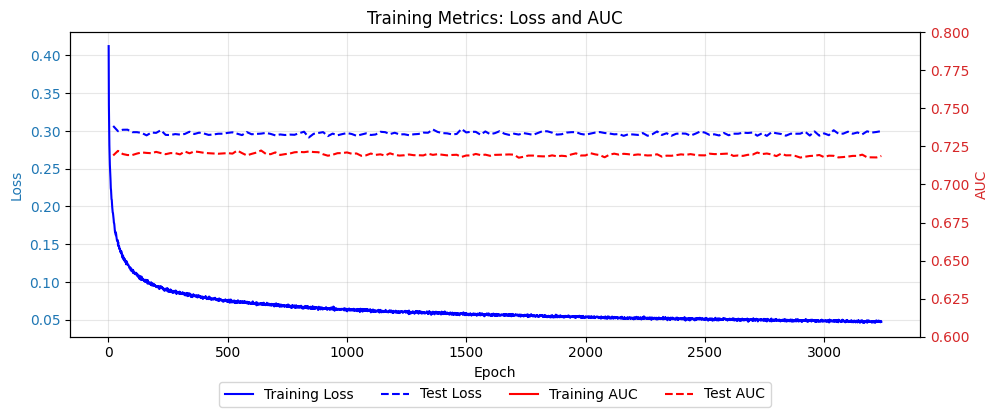

In [14]:
import json
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens'
lr = 0.1
filepath = os.path.join(output_dir, 'metadata_nl32_lr1_ns', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
axs['auc'].set_ylim([0.6,0.8])

filepath = os.path.join(output_dir, 'metadata_nl64_lr1_ns', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
axs['auc'].set_ylim([0.6,0.8])

filepath = os.path.join(output_dir, 'metadata_nl128_lr1_ns', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
axs['auc'].set_ylim([0.6,0.8])

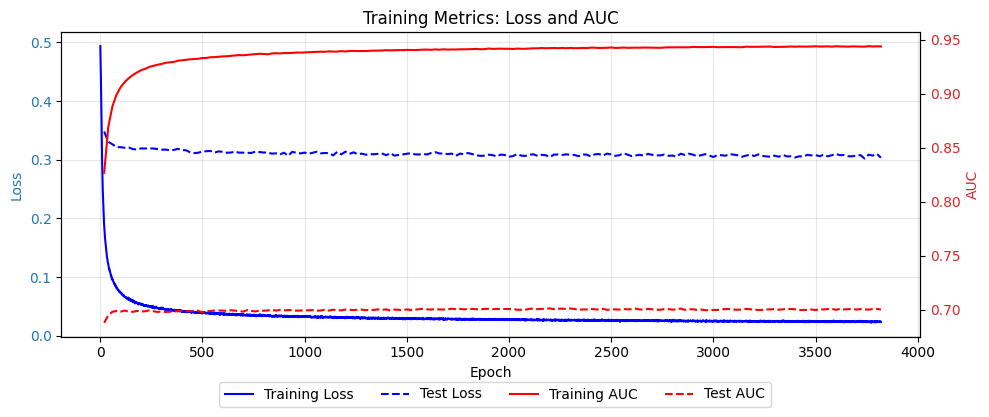

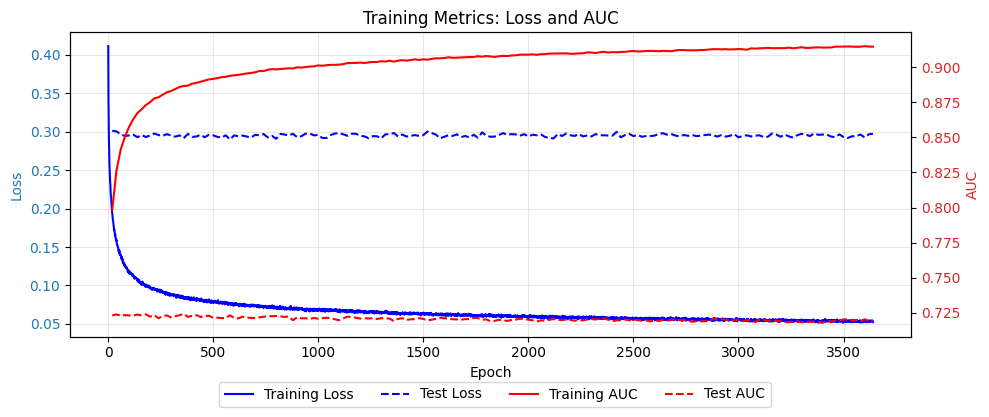

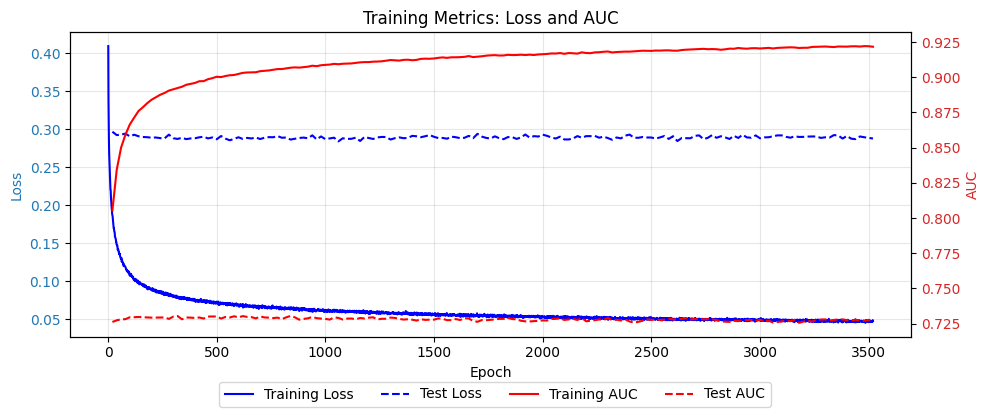

In [15]:
import json
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens'
lr = 0.1
filepath = os.path.join(output_dir, 'indicator_nl64_lr1_ns', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
#axs['auc'].set_ylim([0.6,0.8])

filepath = os.path.join(output_dir, 'metadata_nl64_lr1_ns', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
#axs['auc'].set_ylim([0.6,0.8])

filepath = os.path.join(output_dir, 'both_nl64_lr1_ns', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
#axs['auc'].set_ylim([0.6,0.8])

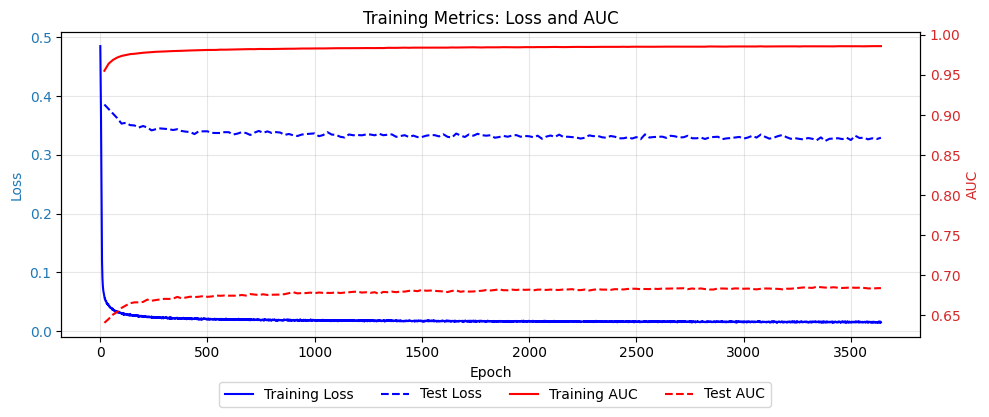

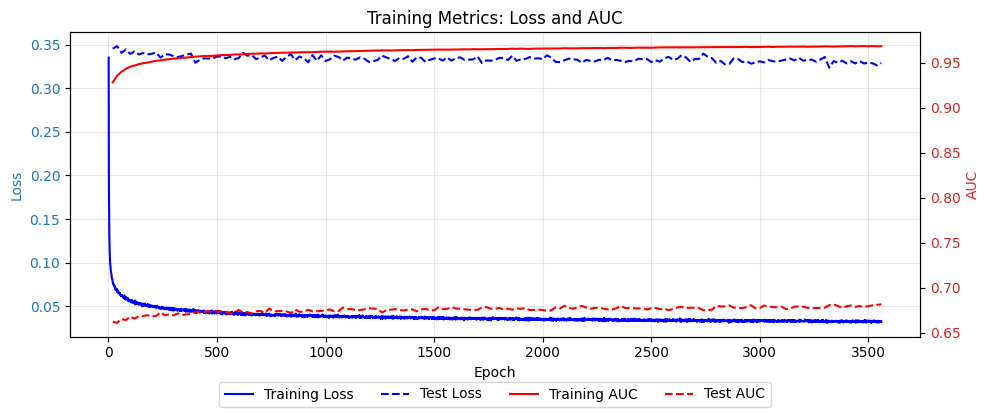

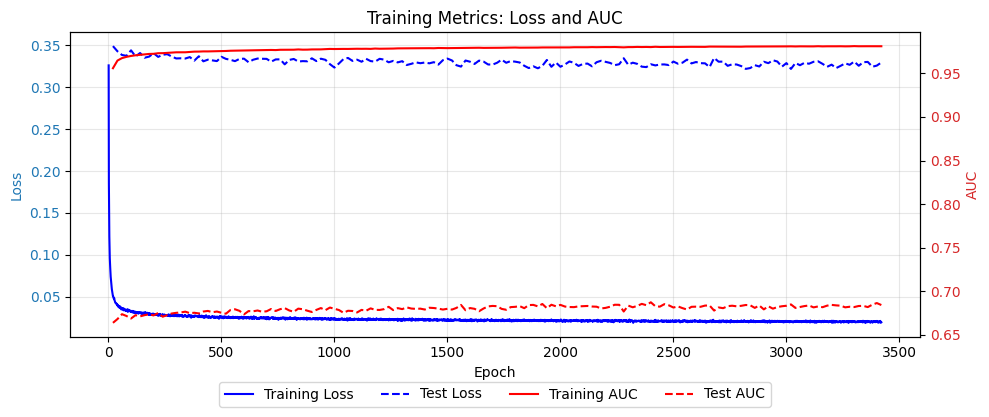

In [16]:
import json
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens'
lr = 0.1
filepath = os.path.join(output_dir, 'indicator_nl64_lr1', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
#axs['auc'].set_ylim([0.6,0.8])

filepath = os.path.join(output_dir, 'metadata_nl64_lr1', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
#axs['auc'].set_ylim([0.6,0.8])

filepath = os.path.join(output_dir, 'both_nl64_lr1', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))
#axs['auc'].set_ylim([0.6,0.8])

INFO - Saved metrics plot to /kfs2/projects/zazzle/pybpr/examples/output/movielens_check/indicator_nl64_lr1/metrics_plot.png
INFO - Saved metrics plot to /kfs2/projects/zazzle/pybpr/examples/output/movielens_check/metadata_nl64_lr1/metrics_plot.png
INFO - Saved metrics plot to /kfs2/projects/zazzle/pybpr/examples/output/movielens_check/both_nl64_lr1/metrics_plot.png


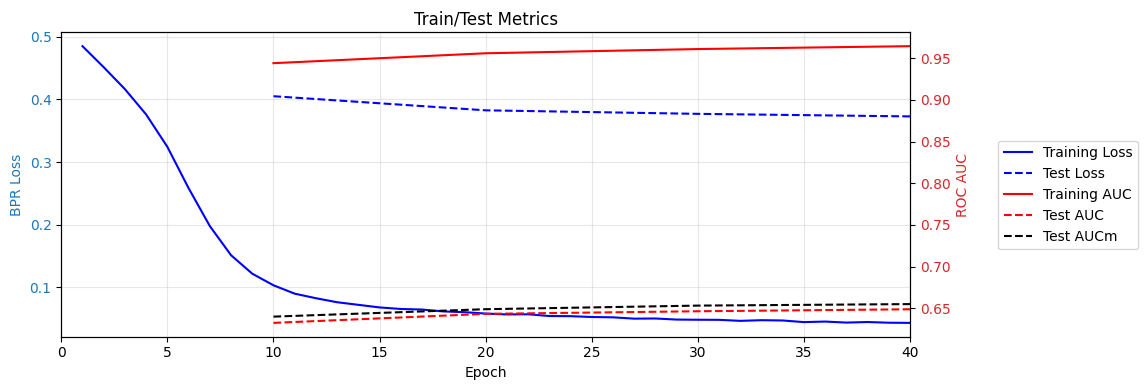

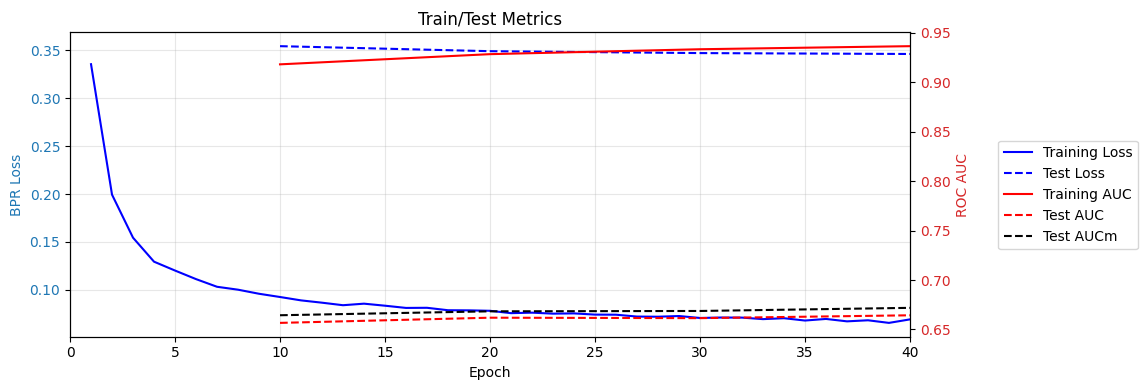

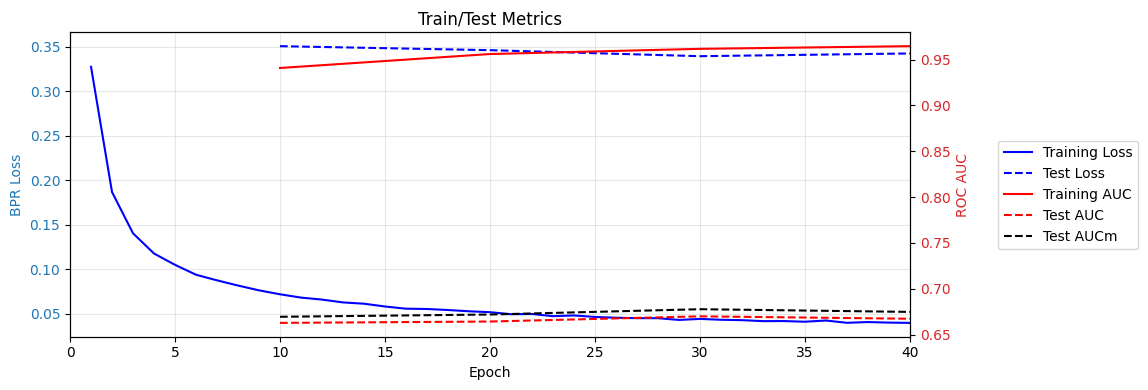

In [99]:
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens_check'
filepath = os.path.join(output_dir, 'indicator_nl64_lr1', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))

filepath = os.path.join(output_dir, 'metadata_nl64_lr1', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))

filepath = os.path.join(output_dir, 'both_nl64_lr1', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))

In [9]:
axs['auc']

<Axes: title={'center': 'Training Metrics: Loss and AUC'}, ylabel='AUC'>

In [ ]:
import json
output_dir='/kfs2/projects/zazzle/pybpr/examples/output/movielens'
filepath = os.path.join(output_dir, 'indicator_nl64_lr5', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))

filepath = os.path.join(output_dir, 'metadata_nl64_lr5', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))

filepath = os.path.join(output_dir, 'both_nl64_lr5', 'metrics.json')
fig, axs, metrics = RecSys.plot_metrics(filepath, figsize=(10,4))


In [ ]:
metrics

In [ ]:
metrics[metrics.test_auc_mean.notna()]

In [ ]:
fig

In [ ]:
get_matrix_stats(ui.Rneg), get_matrix_stats(ui.Rneg_train), get_matrix_stats(ui.Rneg_test)

In [ ]:
random_col_for_row(matrix=ui.Rpos, row_idx=[0,0,0,0])
random_col_for_row(matrix=ui.Rneg, row_idx=[0,0,0,0])

In [ ]:
min(12,13,14)

In [ ]:
get_matrix_stats(ui.Rpos), get_matrix_stats(ui.Rpos_train)

In [ ]:
csr_pos = ui.Rneg.tocsr()
user_row_counts = np.diff(csr_pos.indptr)
active_users = np.where(user_row_counts > 0)[0]
inactive_users = np.where(user_row_counts == 0)[0]
active_user_set = set(active_users)

In [ ]:
ui.Rneg, ui.Rpos, ui.Fi, ui.Fu, ui.Rpos_train

In [ ]:
len(ui._user_id_to_idx),rdf.UserID[rdf.Rating>=4.].nunique(),rdf.UserID[rdf.Rating<4.].nunique(), rdf.UserID.nunique()
#len(ui._item_id_to_idx),rdf.MovieID[rdf.Rating>=4.].nunique(), rdf.MovieID[rdf.Rating<4.].nunique(), rdf.MovieID.nunique()

In [ ]:
len(ui._user_id_to_idx),rdf.UserID[rdf.Rating<4.].nunique()
len(ui._item_id_to_idx),

In [ ]:
len(active_user_set), len(inactive_users)
find_empty_rows_cols(ui.Rneg)

In [ ]:
adam = partial(
    torch.optim.Adam,
    lr=0.1,
    weight_decay=0.0
)
rs = RecSys(
    ui_data = ui,
    n_latent=64,
    optimizer=adam,
    verbose=False
)
rs

In [ ]:
rs.fit(n_iter=100, batch_size=100000)

In [ ]:
rs._log

In [ ]:
ui.validate_data()

In [ ]:
ui.Rneg, ui.Rpos, ui.Fu, ui.Fi

In [ ]:
find_empty_rows_cols(ui.Rpos)

In [ ]:
import numpy as np
from scipy import sparse

def find_empty_rows_cols(coo_matrix):
    """
    Find rows and columns that have no non-zero elements in a scipy sparse COO matrix.
    
    Parameters:
    -----------
    coo_matrix : scipy.sparse.coo_matrix
        The sparse matrix in COO format
    
    Returns:
    --------
    empty_rows : numpy.ndarray
        Indices of rows with no non-zero elements
    empty_cols : numpy.ndarray
        Indices of columns with no non-zero elements
    """
    # Get matrix dimensions
    n_rows, n_cols = coo_matrix.shape
    
    # Find rows that have at least one non-zero element
    rows_with_data = np.unique(coo_matrix.row)
    
    # Find columns that have at least one non-zero element
    cols_with_data = np.unique(coo_matrix.col)
    
    # Create arrays with all possible row and column indices
    all_rows = np.arange(n_rows)
    all_cols = np.arange(n_cols)
    
    # Find rows and columns without data using set difference
    empty_rows = np.setdiff1d(all_rows, rows_with_data)
    empty_cols = np.setdiff1d(all_cols, cols_with_data)
    
    return empty_rows, empty_cols

In [ ]:
_ = ui.train_test_split()

In [ ]:
ui = UserItemData(name='User-Metadata-only')
ui.add_positive_interactions(
    user_indices=rdf.UserID_ids[rdf.Rating>=4.], 
    item_indices=rdf.MovieID_ids[rdf.Rating>=4.]
)
ui.add_negative_interactions(
    user_indices=rdf.UserID_ids[rdf.Rating<4.], 
    item_indices=rdf.MovieID_ids[rdf.Rating<4.]
)
ui.add_user_features(
    user_indices=list(range(ui.n_users)), 
    feature_indices=list(range(ui.n_users))
)
ui.add_item_features(
    item_indices=tdf.MovieID_ids, 
    feature_indices=tdf.TagID_ids,
    #feature_weights=tdf.Relevance
)
ui.train_test_split(0.2)
ui

In [ ]:
csr = ui.Rpos_coo.tocsr()
np.unique(csr.nonzero()[0])

In [ ]:
n_items = rdf.MovieID.nunique()
n_users = rdf.UserID.nunique()
n_item_mfeatures = tdf.TagID.nunique()

In [ ]:
n_items = rdf.MovieID.nunique()
n_users = rdf.UserID.nunique()
n_item_mfeatures = tdf.TagID.nunique()
ui_metadata = UserItemData(
    name='User-Metadata-only',
    n_users=n_users, 
    n_items = n_items,
    n_user_features=n_users,
    n_item_features=n_item_mfeatures
    
)
ui_metadata.add_interactions(
    user_indices=rdf.UserID_ids[rdf.Rating>=4.], 
    item_indices=rdf.MovieID_ids[rdf.Rating>=4.],
    positive=True
)
ui_metadata.add_interactions(
    user_indices=rdf.UserID_ids[rdf.Rating<4.], 
    item_indices=rdf.MovieID_ids[rdf.Rating<4.],
    positive=False
)
ui_metadata.add_user_features(
    user_indices=list(range(n_users)), 
    feature_indices=list(range(n_users))
)
ui_metadata.add_item_features(
    item_indices=tdf.MovieID_ids, 
    feature_indices=tdf.TagID_ids,
    #feature_weights=tdf.Relevance
)
ui_metadata.train_test_split(0.2)
ui_metadata

In [ ]:
adam = partial(
    torch.optim.Adam,
    lr=0.1,
    weight_decay=0.0
)
rs = RecSys(
    ui_data = ui_metadata,
    n_latent=64,
    optimizer=adam,
    verbose=False
)
rs
#rs.fit(n_iter=50, batch_size=100000, verbose=False)

In [ ]:
rs.fit(n_iter=100, batch_size=100000)

In [ ]:
# rs.fit(n_iter=5, batch_size=100000)

In [ ]:
rs.predict(user_ids=[0,1,2],item_ids=[123, 11]).detach()

In [ ]:
auc_mean = np.array([iy for ix,iy,iz in rs.auc_tracker])
auc_std = np.array([iz for ix,iy,iz in rs.auc_tracker])
epochs = list(range(len(rs.loss_tracker)))

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(epochs, rs.loss_tracker, '-r', label='BPR_LOSS')
ax[1].plot(epochs, auc_mean, '-b', label='Auc Score')
ax[1].fill_between(epochs, auc_mean-1*auc_std, auc_mean+1*auc_std, color='b', alpha=0.2)
#ax[1].set_ylim([0,1])
for iax in ax:
    iax.legend()

In [ ]:
valid_users = np.unique(rs.Rpos_train_coo.row)
for uid in valid_users:
    rs.compute_roc_auc_score(uid)

In [ ]:
valid_users = np.unique(rs.Rpos_train_coo.row)
valid_items_pos = np.unique(rs.Rpos_train_coo.col)
valid_items_neg = np.unique(rs.Rpos_train_coo.col)

In [ ]:
rs.Rpos_train_coo, rs.Rpos_train_lil, rs.Rpos_train_coo.tolil()

In [ ]:
rs.data.Rpos_coo, rs.Rpos_train_coo, rs.Rpos_test_coo

In [ ]:
rs.Rpos_train_lil.rows[uid]

In [ ]:
# ROC_AUC metric
list_of_auc = []
for uid in np.random.choice(valid_users, 100):
    item_ids_pos = rs.Rpos_train_lil.rows[uid]
    item_ids_neg = rs.Rneg_lil.rows[uid]
    if (len(item_ids_pos) > 5) & (len(item_ids_neg) > 5):
        item_ids = np.concatenate((item_ids_pos, item_ids_neg))
        ytrue_binary = np.zeros(len(item_ids), dtype=int)
        ytrue_binary[:len(item_ids_pos)] = 1
        ypred = rs.predict(
            user_ids=[uid],
            item_ids=item_ids
        )
        inds_sorted = np.argsort(ypred.squeeze().tolist())[::-1][:len(item_ids_pos)]
        ypred_binary = np.zeros(len(item_ids), dtype=int)
        ypred_binary[inds_sorted] = 1
        #ypred = torch.heaviside(ypred, torch.tensor([0.])).squeeze().tolist()
        #print(uid, len(ypred), len(ytrue),  len(item_ids))
        auc_score = sklearn.metrics.roc_auc_score(ytrue_binary, ypred_binary)
        #print(ytrue, ypred, auc_score)
    list_of_auc.append(auc_score)

In [ ]:
list_of_auc

In [ ]:
for ix,iy in zip(ytrue_binary, ypred_binary):
    print(ix, iy)

In [ ]:
vals, inds = torch.sort(ypred, descending=True)
[ix for ix in inds[:len(item_ids_pos)]], len(item_ids_pos)

In [ ]:
ypred = [0 for _ in range(len(item_ids))]
ypred[inds[:len(item_ids_pos)]] = 

In [ ]:
xx = np.zeros(10)
xx[[2,3]] = 1.
xx

In [ ]:
uid = 964
item_ids_pos = rs.Rpos_train_lil.rows[uid]
item_ids_neg = rs.Rneg_lil.rows[uid]
print(len(item_ids_pos), len(item_ids_neg))
item_ids = item_ids_pos + item_ids_neg
ytrue = rs.Rpos_train_lil.data[uid]
#ytrue += [0 for ix in rs.Rneg_lil.data[uid]]
print(len(item_ids), len(ytrue))

In [ ]:
for ix, iy in zip(ytrue, ypred):
    print(ix, iy)

In [ ]:
list_of_auc

In [ ]:
for ix,iy, iz in zip(iids, pdata, xx):
    print(ix, iy, iz)

In [ ]:
users = np.unique(rs.Rpos_test_coo.row)
len(users)
xx = rs.predict(users)
print(xx.shape)
xx = torch.tanh(xx)
#xx -= torch.min(xx)
#xx /= torch.max(xx)
#xx = torch.nn.functional.softmax(xx, dim=0)

print(xx.shape)

In [ ]:
yy = rs.Rpos_test_csr[users].tocoo()
values = yy.data
indices = np.vstack((yy.row, yy.col))

i = torch.LongTensor(indices)
v = torch.FloatTensor(values)
shape = yy.shape

yyy = torch.sparse.FloatTensor(i, v, torch.Size(shape))


In [ ]:
# numpy_array = xx.detach().numpy()
hist, bin_edges = torch.histogram(xx, bins=10)
# Plot the histogram
plt.plot(bin_edges.detach().numpy()[:-1], hist.detach().numpy())
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of PyTorch Tensor')
plt.show()

In [ ]:
y_pred = torch.flatten(xx.detach())
y_true = torch.flatten(yyy.to_dense())
y_pred, y_true

In [ ]:
import torch
import sklearn
from torcheval.metrics import BinaryAUROC, AUC



# # Sample data
y_true = torch.tensor([1, 0, 1, 0, 1, 0])
y_pred = torch.tensor([0, -1, 0, -0.4, 0.4, 0.4])
y_pred = torch.tensor([1, 0, 1, 0, 1, 0])
#y_pred = torch.tensor([1, 0, 1, 1, 0, 1])

# # Create the metric object
# auroc = AUC()

# # Update the metric with your data
# auroc.update(y_pred, y_true.to_dense())

# # Compute the AUC-ROC score
# #score = auroc.compute()

sklearn.metrics.roc_auc_score(y_true, y_pred)

In [ ]:
xx[0].shape, yyy[0].shape

In [ ]:
rs.model.user_latent

In [ ]:
ui_indicator = UserItemData(
    n_users=n_users, 
    n_items = n_items,
    n_user_features=n_users,
    n_item_features=n_items
    
)
ui_indicator.add_interactions(
    user_indices=rdf.UserID_ids, 
    item_indices=rdf.MovieID_ids,
    weights=rdf.Weights
)
ui_indicator.add_user_features(
    user_indices=list(range(n_users)), 
    feature_indices=list(range(n_users))
)
ui_indicator.add_item_features(
    item_indices=list(range(n_items)), 
    feature_indices=list(range(n_items)),
)
ui_indicator

In [ ]:
ui_both = UserItemData(
    n_users=n_users, 
    n_items = n_items,
    n_user_features=n_users,
    n_item_features=n_items + n_item_mfeatures
    
)
ui_both.add_interactions(
    user_indices=rdf.UserID_ids, 
    item_indices=rdf.MovieID_ids,
    weights=rdf.Weights
)
ui_both.add_user_features(
    user_indices=list(range(n_users)), 
    feature_indices=list(range(n_users))
)
ui_both.add_item_features(
    item_indices=list(range(n_items)) + list(tdf.MovieID_ids), 
    feature_indices=list(range(n_items)) + [ix+n_items for ix in tdf.TagID_ids],
)
ui_both

In [ ]:
list(range(5))

In [ ]:
adam = partial(
    torch.optim.Adam,
    lr=0.13,
    weight_decay=0.001
)
sgd = partial(
    torch.optim.SGD,
    lr=0.13,
    weight_decay=0.001
)

In [ ]:
rs_metadata = RecSys(
    ui_data = ui_metadata,
    n_latent=64,
    optimizer=adam
)
rs_metadata.fit(n_iter=50, batch_size=100000, verbose=False)

In [ ]:
rs_indicator = RecSys(
    ui_data = ui_indicator,
    n_latent=64,
    optimizer=adam
)
rs_indicator.fit(n_iter=50, batch_size=100000, verbose=False)

In [ ]:
rs_both = RecSys(
    ui_data = ui_both,
    n_latent=64,
    optimizer=adam
)
rs_both.fit(n_iter=50, batch_size=100000, verbose=False)

In [ ]:
rs_both_sgd = RecSys(
    ui_data = ui_both,
    n_latent=64,
    optimizer=sgd
)
rs_both_sgd.fit(n_iter=50, batch_size=100000, verbose=False)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rs_indicator.loss_tracker, '-r', label='item-indicator-features-only')
ax.plot(rs_metadata.loss_tracker, '-b', label='item-metadata-features-only')
ax.plot(rs_both.loss_tracker, '-g', label='item-metadata+indicator-features')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rs_indicator.loss_tracker, '-r', label='item-indicator-features-only')
ax.plot(rs_metadata.loss_tracker, '-b', label='item-metadata-features-only')
ax.plot(rs_both.loss_tracker, '-g', label='item-metadata+indicator-features')
ax.legend()

In [ ]:
rs.Rneg_coo.shape

In [ ]:
# look at validation loss as well if you see these oscillations
